In [1]:
import cv2
import numpy as np
cap = cv2.VideoCapture('MDR_221009_024928.AVI') # videos 폴더의 04.mp4 파일

while True:
    ret, img = cap.read()

    cv2.imshow('result', img)
    if cv2.waitKey(1) == ord('q'):
        cv2.imwrite('capture0.jpg', img)
        break        
cap.release() # 동영상 파일 닫고 메모리 해제

캡처로 찍어서 차선인식범위를 맞추기 위해서 코드를 사용했다.

In [2]:
import cv2
import numpy as np

cap = cv2.VideoCapture('Night.mp4') # videos 폴더의 04.mp4 파일

ret, img = cap.read()
cv2.imshow('result', img)
cv2.waitKey()

cv2.imwrite('aaa.jpg', img)  # 이미지 저장

cap.release() # 동영상 파일 닫고 메모리 해제

cv2.imwrite('capture.jpg', result)

NameError: name 'result' is not defined

This image is:  <class 'numpy.ndarray'> with dimensions:  (480, 854, 3)


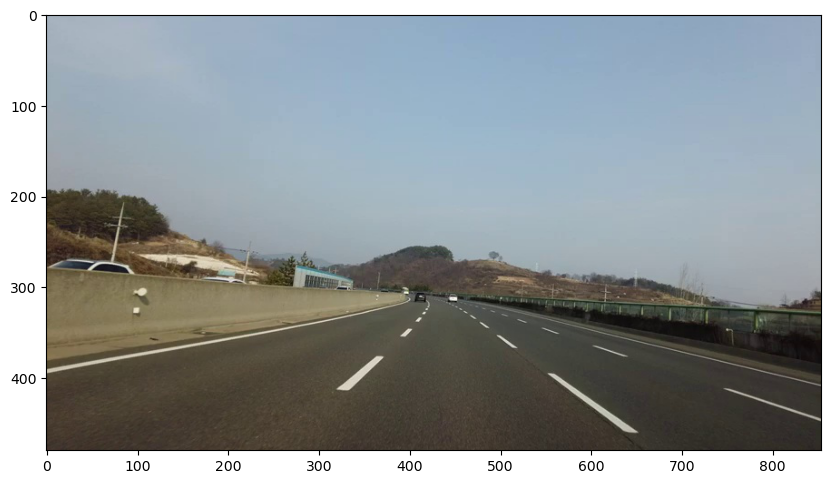

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

img = mpimg.imread('asdlf.jpg')

plt.figure(figsize=(10,8))
print('This image is: ', type(img), 'with dimensions: ', img.shape)
plt.imshow(img)
plt.show()
#이미지 읽어오기

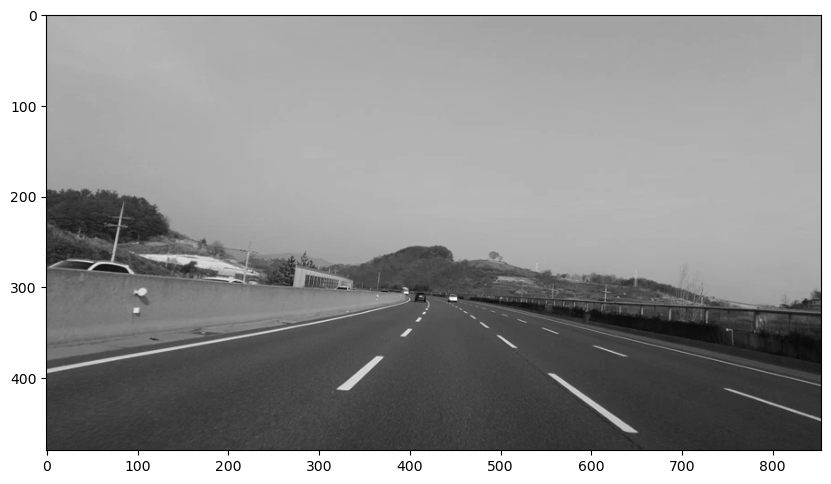

In [4]:
def grayscale(img):
    
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray = grayscale(img)
plt.figure(figsize=(10,8))
plt.imshow(gray, cmap = 'gray')
plt.show()
#gray색으로 변경

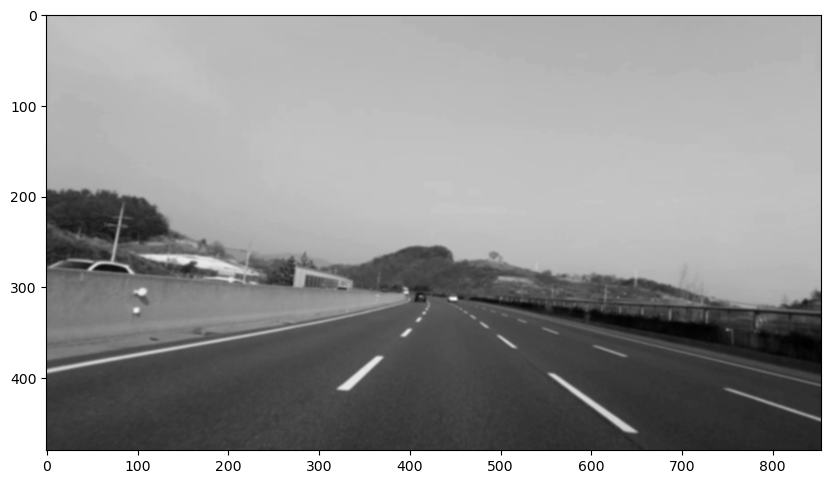

In [5]:
def gaussian_blur(img, kernel_size):
   
    blur_gray = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    return blur_gray

kernel_size = 5
blur_gray = gaussian_blur(gray, kernel_size)
plt.figure(figsize = (10,8))
plt.imshow(blur_gray, cmap = 'gray')
plt.show()
#가우시안 블러

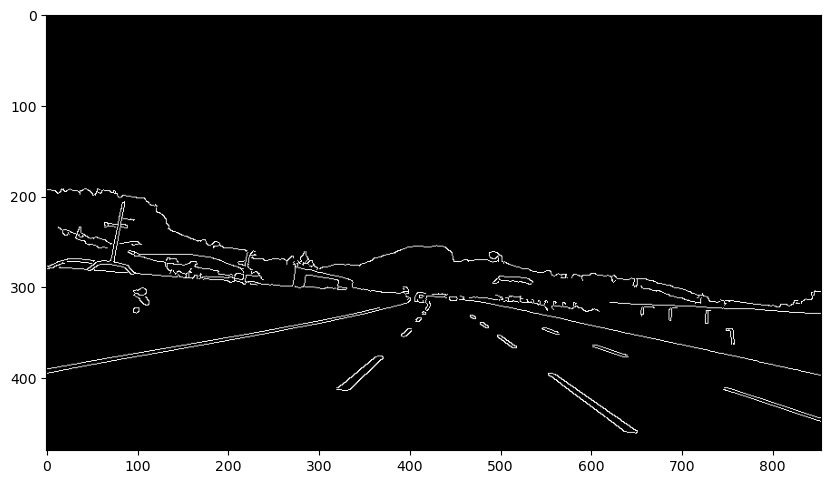

In [6]:
def canny(img, low_threshold, high_threshold):
    
    return cv2.Canny(img, low_threshold, high_threshold)


low_threshold =50
high_threshold = 200
edges = canny(blur_gray, low_threshold, high_threshold)
plt.figure(figsize=(10,8))
plt.imshow(edges, cmap ='gray')
plt.show()
#canny edge detection

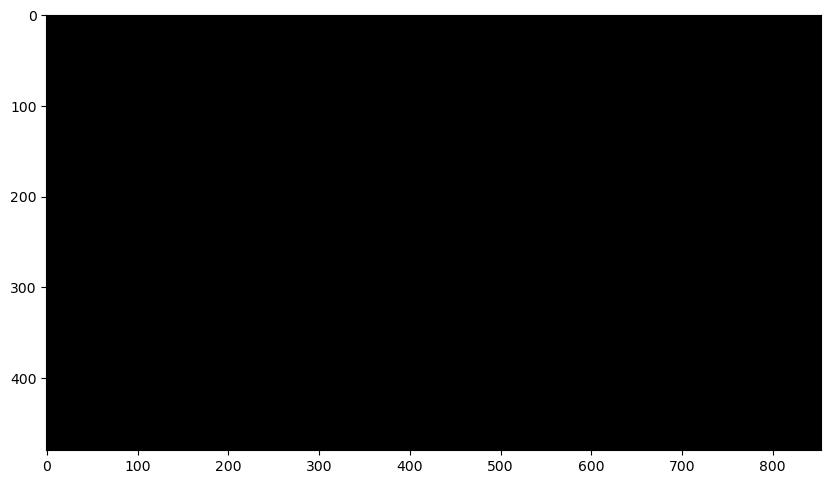

In [7]:
import numpy as np
mask = np.zeros_like(img)

plt.figure(figsize=(10,8))
plt.imshow(mask, cmap = 'gray')
plt.show()
#화면 검정으로 채움.

(480, 854, 3)


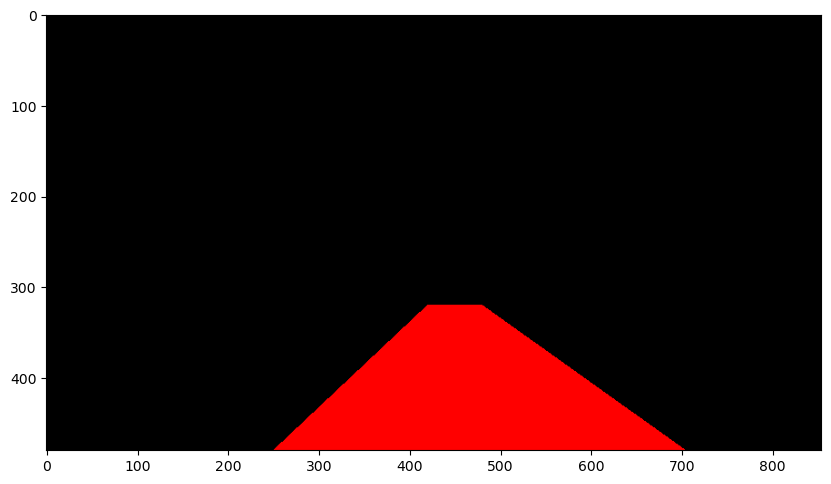

In [8]:
if len(img.shape) > 2:
    channel_count = img.shape[2]
    ignore_mask_color = (255,)
else:
    ignore_mask_color = 255
    
imshape = img.shape
print(imshape)
vertices = np.array([[(250,imshape[0]),   #좌측하단의 꼭지점 좌표 x=100, y= 이미지 높이
                     (420,320),           #좌측 상단의 꼭지점. 
                     (480,320),           #우측 상단의 꼭지점.
                     (imshape[1]-150,imshape[0])]], dtype=np.int32)
                       #우측 하단의 꼭지점 좌표 x=이미지너비-20, y = 이미지높이

cv2.fillPoly(mask, vertices, ignore_mask_color)

plt.figure(figsize=(10,8))
plt.imshow(mask, cmap ='gray')
plt.show()
#사다리꼴 범위안에서 차선을 인식하겠다.

In [9]:

#흰색 차선을 인식
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)    #img와 같은 크기의 빈 이미지
    
    if len(img.shape) >2:    #color 이미지(3채널)라면
        channel_count = img.shape[2]
        ignore_mask_color = (200,) * channel_count

    else:                    #흑백 이미지일 때
        ignore_mask_color =255
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
'''
def region_of_interest(img, vertices):
    # 이미지에서 흰색 영역 추출
    lower_white = np.array([200, 200, 200])
    upper_white = np.array([255, 255, 255])
    white_mask = cv2.inRange(img, lower_white, upper_white)
    white_mask = cv2.cvtColor(white_mask, cv2.COLOR_GRAY2BGR)  # 흑백 이미지를 3채널 이미지로 변환

    # 추출된 흰색 영역과 입력된 다각형의 교집합 추출
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, (255, 255, 255))
    mask = cv2.bitwise_and(mask, white_mask)
    
    # 입력 이미지와 교집합 이미지 비트와이즈 AND 연산
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
'''

'\ndef region_of_interest(img, vertices):\n    # 이미지에서 흰색 영역 추출\n    lower_white = np.array([200, 200, 200])\n    upper_white = np.array([255, 255, 255])\n    white_mask = cv2.inRange(img, lower_white, upper_white)\n    white_mask = cv2.cvtColor(white_mask, cv2.COLOR_GRAY2BGR)  # 흑백 이미지를 3채널 이미지로 변환\n\n    # 추출된 흰색 영역과 입력된 다각형의 교집합 추출\n    mask = np.zeros_like(img)\n    cv2.fillPoly(mask, vertices, (255, 255, 255))\n    mask = cv2.bitwise_and(mask, white_mask)\n    \n    # 입력 이미지와 교집합 이미지 비트와이즈 AND 연산\n    masked_image = cv2.bitwise_and(img, mask)\n    return masked_image\n'

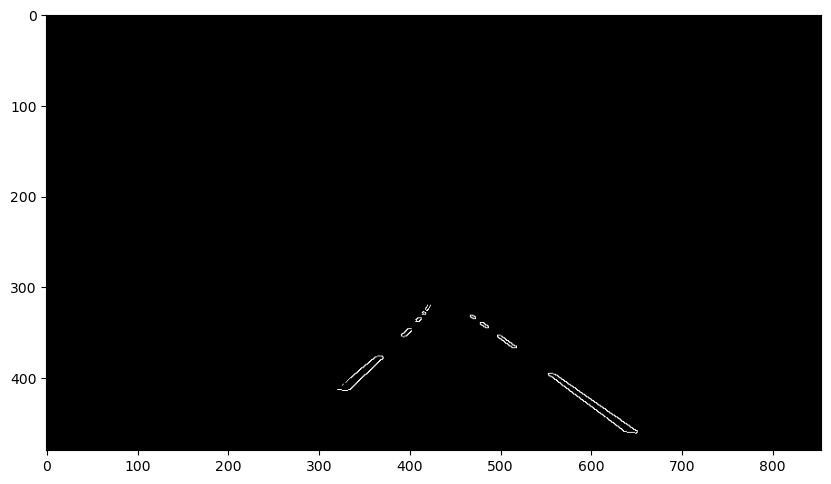

In [10]:
imshape = img.shape
vertices = np.array([[(250,imshape[0]),   #좌측하단의 꼭지점 좌표 x=100, y= 이미지 높이
                     (420,320),           #좌측 상단의 꼭지점. 
                     (480,320),           #우측 상단의 꼭지점.
                     (imshape[1]-150,imshape[0])]], dtype=np.int32)
mask = region_of_interest(edges, vertices)

plt.figure(figsize=(10,8))
plt.imshow(mask, cmap='gray')
plt.show()

In [11]:
# 함수
def draw_lines(img, lines, color=[255, 0, 0], thickness=5):
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

# 함수            
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]),
                            minLineLength=min_line_len,
                            maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img
'''
def draw_lines(img, lines, color=[255, 0, 0], thickness=5):
    img = np.copy(img)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
    return img
'''

'\ndef draw_lines(img, lines, color=[255, 0, 0], thickness=5):\n    img = np.copy(img)\n    for line in lines:\n        for x1, y1, x2, y2 in line:\n            cv2.line(img, (x1, y1), (x2, y2), color, thickness)\n    return img\n'

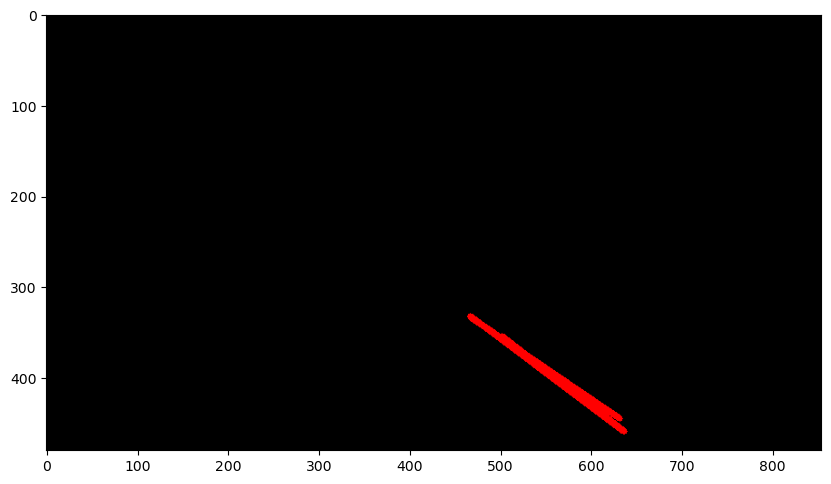

In [12]:
rho = 2
theta = np.pi/180
threshold = 90
min_line_len = 120
max_line_gap = 150

lines = hough_lines(mask, rho, theta, threshold, min_line_len, max_line_gap)

plt.figure(figsize=(10, 8))
plt.imshow(lines, cmap='gray')
plt.show()

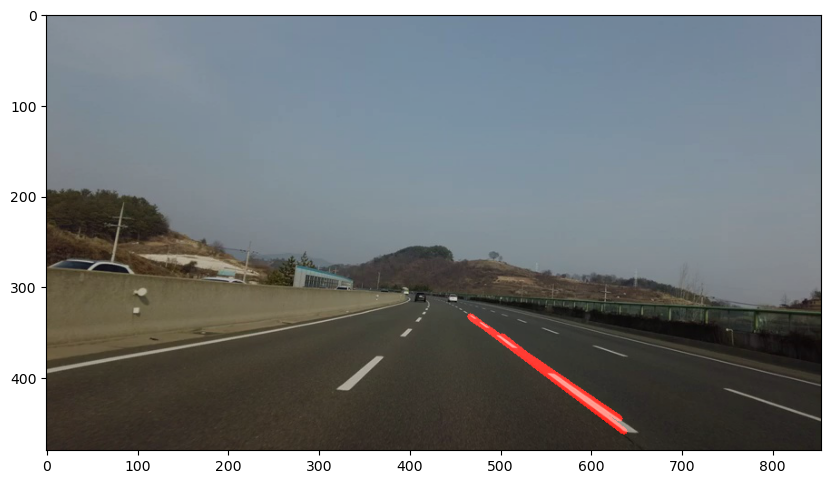

In [13]:
def weighted_img(img, initial_img, a = 0.8, b = 1, c = 0.):
    return cv2.addWeighted(initial_img, a, img, b, c)
 
lines_edges = weighted_img(lines, img, a=0.8, b = 1, c = 0.)

plt.figure(figsize=(10,8))
plt.imshow(lines_edges)
plt.show()

#출력 여러개 볼수있게
#plt.savefig("asdlf{}.jpg".format(i))
#for i in range()
#실제 사진에 선 추출한 범위를 합침